# Análisis Exploratoria de Datos - EDA(Exploratory Data Analysis)
### Autor: [Juan Alejandro Maniglia]

El análisis exploratorio de datos es una forma de analizar datos definido por John W. Tukey (E.D.A.: Exploratory data analysis) es el tratamiento estadístico al que se someten las muestras recogidas durante un proceso de investigación en cualquier campo científico. Para mayor rapidez y precisión, todo el proceso suele realizarse por medios informáticos, con aplicaciones específicas para el tratamiento estadístico.

- [Introducción](#1.-Introducción)
- [Dataset](#2.-Dataset)
- [Limpieza](#3.-Limpieza)
- [Análisis](#4.-Datos)
- [Extras](#5.-Extras)
- [Conclusiones](#6.-Conclusiones)
- [Futuros Trabajos](#7.-Futuros)
<a id='0.Inicio' ></a>

# Introducción <a id='1.-Introducción' ></a>


                                            ¿Qué es el anime?

La palabra **anime** se deriva de de la palabra **animeeshon** generalmente se refiere a la animación japonesa que tiene sus orígenes el los años 60.

El anime es un medio de gran expansión en Japón, siendo al mismo tiempo un producto de entretenimiento comercial y cultural, lo que ha ocasionado un fenómeno cultural en masas populares y una forma de arte tecnológico.

La animación japonesa comercial data desde 1917 con una serie de cortometrajes similares a las producciones americanas, y desde entonces la producción de obras de ánime en Japón ha seguido aumentando de manera constante.

El anime en Japón ahora se distribuye en cines, en emisiones televisivas directamente a los hogares, por canales de cable, DVD, Blu-ray y masivamente a través de Internet para el resto del mundo; clasificándose en numerosos géneros dirigidos a diversas audiencias generales y especializados.

![imagen](..\SRC\UTILS\imagenes\anime_intro.png)

Primeros Pasos

lo primero que vamos a realizar es crear el path para poder importar los los archivos y fotos entre carpetas

In [1]:
import sys 
import os  # obtener el path del jupyter tenemos esto 
root_path = os.path.dirname(os.getcwd())  
root_path  
sys.path.append(root_path)  
sys.path
print('.')

.


Antes de importar las librerias vamos a reviar si tenemos todos los modulos necesarios ejecutando el siguiente codigo.

In [1]:
pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement IPython.display==7.27.0 (from versions: none)
ERROR: No matching distribution found for IPython.display==7.27.0


ahora lo que necesitamos es cargar todas las librerias que vamos a utilizar a lo largo del EDA

In [2]:
from SRC.UTILS.Librerias import *
from SRC.UTILS.Funciones import Csv, Plot, Webscraping
from SRC.UTILS.Path import anime


[Inicio](#0.Inicio)

# Dataset <a id='2.-Dataset' ></a> 

Los **Animes** son clasificados igual que las películas y las series de Tv, en este EDA utilizaremos los datos optenidos de la página web ***www.myanimelist.net*** al principio intente utilizar la API de la propia página pero la actualizaron, y al no me otorgaron los permisos necesarios, decidí buscar los mismos datos pero por otro medio, y el lugar indicado fue ***www.kaggle.com*** de donde pude descargar en formato **csv** que sera presentado a continuación

In [3]:
df = Csv.invocar_dataset(anime)
Csv.mostrar_df(df)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


### Análisis de los datos del DataFrame

Al visualizar los datos nos damos cuenta que tenemos muchos que no son necesarios en este caso como por ejemplo las columnas de los score's separados el nombre en ingles y entre otros, pero antes de realizar toda esta limpieza necesitamos aplicar el .info y el .describe para saber a que tipo de datos nos enfrentamos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [5]:
df.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [6]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

# Limpieza <a id='3.-Limpieza' ></a>

ahora procedemos a realizar una lista con las columnas que no vamos a utilizar

In [7]:
columns_delete = ['MAL_ID', 'English name', 'Japanese name', 'Episodes', 'Premiered', 'Licensors', 'Producers', 'Source',
                  'Duration', 'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch', 'Score-10', 'Score-9',
                   'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'Favorites']

teniendo la lista ahora procedemos a eliminarlas

In [8]:
df = Csv.delete_colunms(df,columns_delete)

ahora eliminamos las filas con datos Unknown

In [9]:
df.columns

Index(['Name', 'Score', 'Genres', 'Type', 'Aired', 'Studios', 'Rating',
       'Ranked', 'Popularity', 'Members'],
      dtype='object')

Renombrar columnas

In [10]:
Csv.rename(df,'Members','Watched')
df

,Name,Score,Genres,Type,Aired,Studios,Rating,Ranked,Popularity,Watched
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,R - 17+ (violence & profanity),28.0,39,1251960
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,R - 17+ (violence & profanity),159.0,518,273145
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,PG-13 - Teens 13 or older,266.0,201,558913
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,PG-13 - Teens 13 or older,2481.0,1467,94683
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,PG - Children,3710.0,4369,13224
...,...,...,...,...,...,...,...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",ONA,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,13116,354
17558,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",TV,2021 to ?,Passione,Unknown,Unknown,17562,7010
17559,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",TV,"Jul, 2021 to ?",Unknown,R - 17+ (violence & profanity),Unknown,17558,11309
17560,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",TV,Unknown,8bit,PG-13 - Teens 13 or older,Unknown,17565,1386


In [11]:
columnas_con_unknown = ['Name', 'Score', 'Genres', 'Type', 'Aired', 'Studios', 'Rating',
                        'Ranked', 'Popularity', 'Watched']

In [12]:
df = Csv.delete_unknown2(df)

rehacer el index

In [13]:
df.reset_index(inplace=True)
lista_delete = ['index']
df = Csv.delete_colunms(df, lista_delete)
Csv.mostrar_df(df)

,Name,Score,Genres,Type,Aired,Studios,Rating,Ranked,Popularity,Watched
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,R - 17+ (violence & profanity),28.0,39,1251960
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,R - 17+ (violence & profanity),159.0,518,273145
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,PG-13 - Teens 13 or older,266.0,201,558913
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,PG-13 - Teens 13 or older,2481.0,1467,94683
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,PG - Children,3710.0,4369,13224


ahora convertimos los datos numericos en formato str a float para poder trabajar con ellos

In [14]:
df[['Score', 'Ranked']] = df[['Score', 'Ranked']].astype(float)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        8369 non-null   object 
 1   Score       8369 non-null   float64
 2   Genres      8369 non-null   object 
 3   Type        8369 non-null   object 
 4   Aired       8369 non-null   object 
 5   Studios     8369 non-null   object 
 6   Rating      8369 non-null   object 
 7   Ranked      8369 non-null   float64
 8   Popularity  8369 non-null   int64  
 9   Watched     8369 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 654.0+ KB


lo siguiente seria cambiar el tipo de la columna Aired ya que son fechas y esta en formato str

In [16]:
df = Csv.aired_to_year(df,'Aired')
df = Csv.delete_colunms(df,'Aired')
df = Csv.only_year(df,'Year_Aired')
df = Csv.delete_colunms(df,'Year_Aired')

ahora vamos a ver la correlacion y el describe para saber que tipo de relacion tenemos

In [17]:
df.corr()

,Score,Ranked,Popularity,Watched
Score,1.000000,-0.978477,-0.624931,0.419912
Ranked,-0.978477,1.000000,0.646027,-0.377607
Popularity,-0.624931,0.646027,1.000000,-0.478205
Watched,0.419912,-0.377607,-0.478205,1.000000


In [18]:
df.describe()

,Score,Ranked,Popularity,Watched
count,8369.000000,8369.000000,8369.000000,8.369000e+03
mean,6.793928,4684.956626,5069.949815,7.028641e+04
std,0.798621,2942.147981,3469.515144,1.745132e+05
min,2.180000,1.000000,1.000000,2.060000e+02
25%,6.270000,2158.000000,2118.000000,3.040000e+03
50%,6.800000,4452.000000,4459.000000,1.265900e+04
75%,7.340000,7016.000000,7791.000000,5.515500e+04
max,9.190000,11073.000000,14826.000000,2.589552e+06


[Inicio](#0.Inicio)

# Análisis <a id='4.-Datos' ></a>


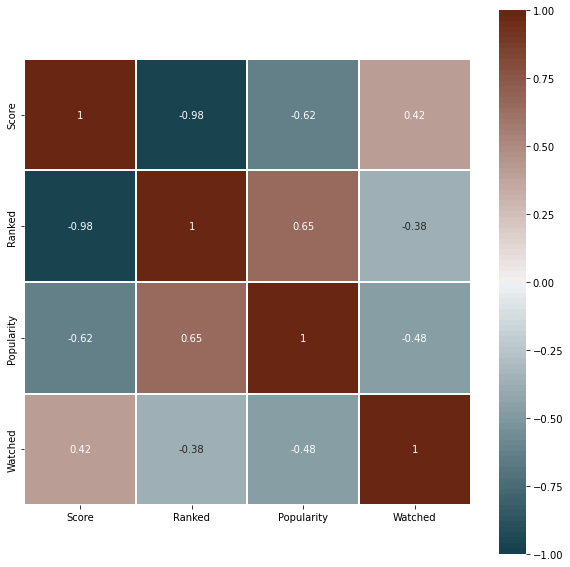

In [19]:
Plot.mapa_calor(df)

En esta gráfica podemos ver que existe correlacion entre Ranked y Score, Popularity y Scorre, Ranked y Popularity, los cuales vamos a ir analizando a lo largo de este EDA 

Lo primero que quiero saber es cual es el tipo que mas se produce y que score promedio tiene

Esto lo voy a poder observar con una grafica que una count, score y type

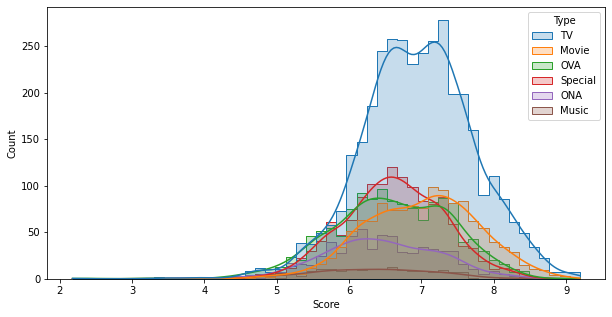

In [20]:
Plot.hist(df,'Score','Type')

no me interesan los del tipo special ona y music asi que vamos a filtrar

In [21]:
lista = ['Special', 'ONA', 'Music']
df = Csv.delete_specific_type2(df)

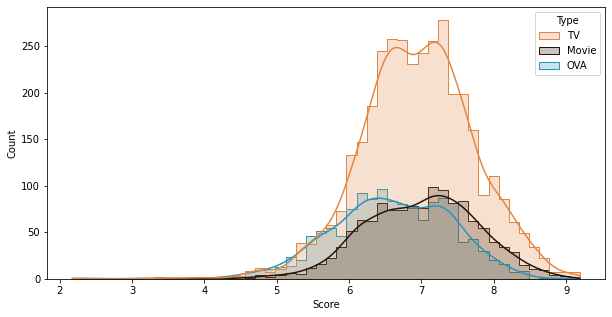

In [22]:
Plot.hist(df,'Score','Type')

En esta gráfica podemos notar que el anime TV es el que tiene mayor count porque la mayoria esta sobre la media por diferencia de las movies que aunque no son tantas como los anime TV esta distribuida mas uniformemente y al analizar las OVAs nos fijamos que tambien tiene una tendencia como los anime TV esto se debe a que la mayoria de las OVAs son capitulos especiales de los anime TV 

Al observar la gráfica nos hace preguntarnos si hay alguna relacion entre los tipos y observando los datos  

Para ello notamos que existe la columna Rating el cual es indiferente para el tipo

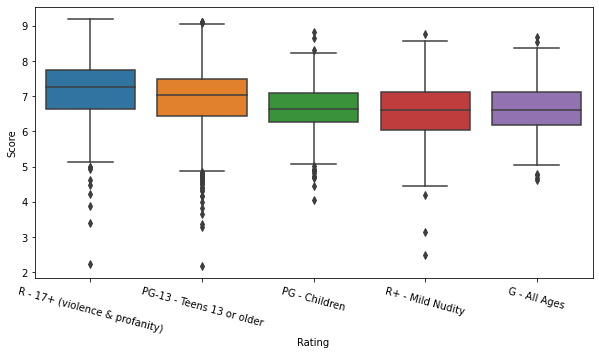

In [23]:
Plot.box(df,'Score','Rating')

Como podemos observar el Score promedio para cada Rating es muy similar pero si podemos notar los outliers que dentro de cada Rating 

tambien vamos a ver cual es el genero que mas se produce

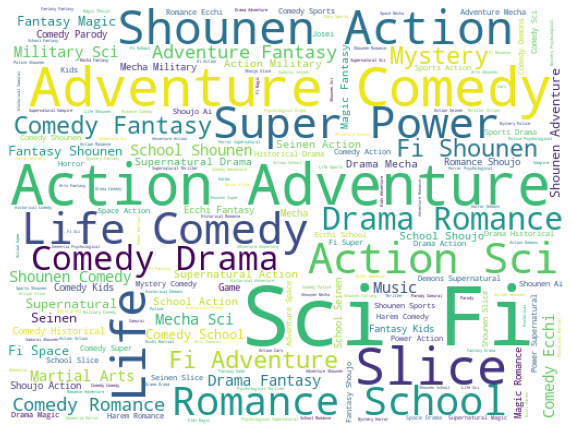

In [24]:
generos = Csv.agrupar_genero(df,'Genres')
Plot.palabras(generos)

Aunque se ve bien no se entiende cual es el que mas se repeite asi que vamos a utilizar otra gráfica

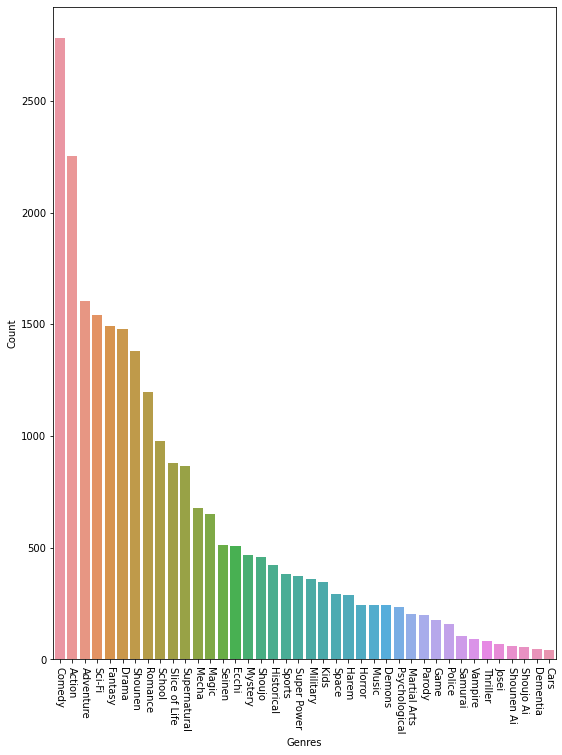

In [25]:
df_generos = Csv.generos(df)
Plot.barras(df_generos,'Genres','Count')

ahora vamos a ver como se desarrolla los valores a lo largo de los años para ello vamos a agrupar por año para ver la cantidad de miembros por año pro ejemplo

In [26]:
df_year = Csv.agrupar_por_promedio(df,'Year')
Plot.scatter(df_year,'Watched')

In [27]:
Plot.scatter(df_year,'Score')

Que estudios producen mas anime para ello tomaremos los 50 primeros

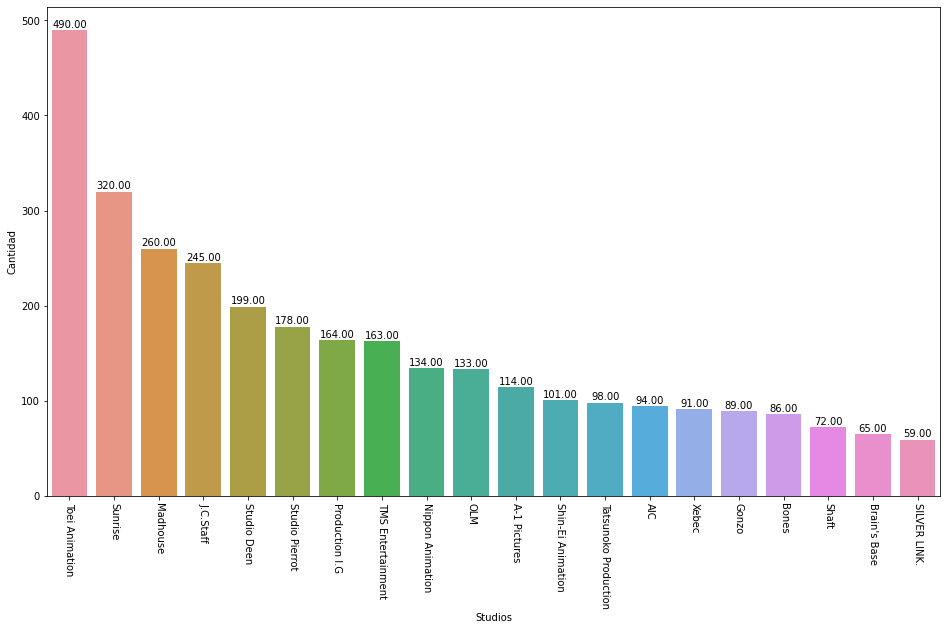

In [28]:
df_Studios = Csv.agrupar_por_count(df,'Studios','Cantidad').head(20)
Plot.barras_index(df_Studios,'Cantidad')

Cuales serian los animes que estan en la cima del raked

In [29]:
Csv.order_for(df,'Ranked').head(20)[['Studios','Name','Score']]


,Studios,Name,Score
2895,Bones,Fullmetal Alchemist: Brotherhood,9.19
8006,MAPPA,Shingeki no Kyojin: The Final Season,9.17
3792,White Fox,Steins;Gate,9.11
7728,Wit Studio,Shingeki no Kyojin Season 3 Part 2,9.10
5796,Bandai Namco Pictures,Gintama°,9.10
4214,Madhouse,Hunter x Hunter (2011),9.10
3943,Sunrise,Gintama',9.08
687,"Artland, Magic Bus",Ginga Eiyuu Densetsu,9.07
4680,Sunrise,Gintama': Enchousen,9.04
6955,Shaft,3-gatsu no Lion 2nd Season,9.00


podemos notar que el hecho que un studio produzca mas anime que otro no necesariamente es porque tengan mas exitos

Cuales son los animes mas visto?

Esto lo podemos ver mediante una tabla por numero de Watched

In [30]:
Csv.order_for(df, 'Watched',asc=False).head(20)[['Studios','Name','Score']]

,Studios,Name,Score
1249,Madhouse,Death Note,8.63
4795,Wit Studio,Shingeki no Kyojin,8.48
2895,Bones,Fullmetal Alchemist: Brotherhood,9.19
4295,A-1 Pictures,Sword Art Online,7.25
5899,Madhouse,One Punch Man,8.57
6237,Bones,Boku no Hero Academia,8.11
5308,Studio Pierrot,Tokyo Ghoul,7.81
10,Studio Pierrot,Naruto,7.91
3792,White Fox,Steins;Gate,9.11
5080,Madhouse,No Game No Life,8.20


teniendo estas dos tablas podemos compararlas a ver que tipo de relacion tienen

In [31]:
Csv.side_by_side((Csv.order_for(df,'Ranked').head(20)[['Studios','Name','Score']]),(Csv.order_for(df, 'Watched',asc=False).head(20)[['Studios','Name','Score']]), titles=['Ranked','Watched'])

,Studios,Name,Score
2895,Bones,Fullmetal Alchemist: Brotherhood,9.19
8006,MAPPA,Shingeki no Kyojin: The Final Season,9.17
3792,White Fox,Steins;Gate,9.11
7728,Wit Studio,Shingeki no Kyojin Season 3 Part 2,9.10
5796,Bandai Namco Pictures,Gintama°,9.10
4214,Madhouse,Hunter x Hunter (2011),9.10
3943,Sunrise,Gintama',9.08
687,"Artland, Magic Bus",Ginga Eiyuu Densetsu,9.07
4680,Sunrise,Gintama': Enchousen,9.04
6955,Shaft,3-gatsu no Lion 2nd Season,9.00


Podemos notar que aunque sea el mas Ranked no necesariamente tiene que ser el mas visto

Ya con todo lo analizado antes, cuales serian los animes mas valorados y vistos para ello vamos a filtar todos los animes que esten sobre la media y que esten por encima del percentil 70 de la cantidad vistos

In [32]:
Csv.super_animes(df)


,Name,Score,Genres,Type,Studios,Rating,Ranked,Popularity,Watched,Year
2895,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,Bones,R - 17+ (violence & profanity),1.0,3,2248456,2009
1249,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",TV,Madhouse,R - 17+ (violence & profanity),60.0,1,2589552,2006
5899,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",TV,Madhouse,R - 17+ (violence & profanity),81.0,5,2123866,2015
4795,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",TV,Wit Studio,R - 17+ (violence & profanity),115.0,2,2531397,2013
6237,Boku no Hero Academia,8.11,"Action, Comedy, School, Shounen, Super Power",TV,Bones,PG-13 - Teens 13 or older,400.0,6,1909814,2016
10,Naruto,7.91,"Action, Adventure, Comedy, Super Power, Martia...",TV,Studio Pierrot,PG-13 - Teens 13 or older,660.0,8,1830540,2002
5308,Tokyo Ghoul,7.81,"Action, Mystery, Horror, Psychological, Supern...",TV,Studio Pierrot,R - 17+ (violence & profanity),807.0,7,1895488,2014
4295,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",TV,A-1 Pictures,PG-13 - Teens 13 or older,2584.0,4,2214395,2012


y para terminar quiero saber que tipo de gustos tendo asi que generando una lista con mis animes favoritos voy a ver si estoy dentro de la media de score

In [33]:
mis_animes_favoritos = ['Death Note', 'One Piece', 'Dragon Ball', 'One Outs', 'Bleach', 
                        'Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai', 'Katekyo Hitman Reborn!', 
                        'Fullmetal Alchemist: Brotherhood', 'Great Teacher Onizuka', 
                        'Kaichou wa Maid-sama!', 'Neon Genesis Evangelion','Kuroshitsuji', 
                        'Code Geass: Hangyaku no Lelouch', 'ReLIFE', 'Darker than Black: Kuro no Keiyakusha']



In [34]:
df_favoritos = Csv.mi_df(df,mis_animes_favoritos)
Csv.gusto(df, df_favoritos)



'Tienes Buen Gusto'

[Inicio](#0.Inicio)

# Extras <a id='5.-Extras' ></a>

Como extra vamos a realizar una funcion para buscar por google image y hacer un screenshot de la lista que animes que me gustan

In [36]:
## Webscraping.screenshot(mis_animes_favoritos)

[Inicio](#0.Inicio)

# Conclusiones <a id='6.-Conclusiones' ></a>

Con lo anterior analisado podemos apreciar varias cosas entre las que destacan

1.- Se puede hacer un EDA de cualquier tema siempre y cuando nos surjan algunas dudas y tengamos unos datos para analizar

2.- Los EDAs no necesariamente son dificiles ni complicados como podriamos imaginar sobre todo si sabemos lo que queremos analizar

3.- Sobre este EDA en particular podemos declarar que se cumplieron los objetivos como saber cual es el tipo de anime mas visto, que el
    Score no varia tanto segun el Rating, que los generos mas vistos son comedia, acción y aventura, que el Ranked y la cantidad de vistas aunque tengan una correlacion de 0.38 no llega ni al 25% de relación.

[Inicio](#0.Inicio)

# Futuros Trabajos <a id='7.-Futuros' ></a>

Como futuros trabajos con respecto a este EDA, se plantea la posibilidad de anexar mas base de dato, mejorar la funcionabilidadd de las funciones para agregar a la lista de mis animes favoritos, y tambien todo mejorar las gráficas ya que es bien sabido que una imagen vale mas que mil palabras y para eso se utilizan las gráficas.

[Inicio](#0.Inicio)